## Pushing German Traffic Signs Recognition Benchmark (GTSRB) beyond human performance level(98.84%)
#### User is assumed to download data from this link [Dataset](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip)

### 1-  Checking system config

In [1]:
# Verify python version
import platform
print(platform.python_version())
# Verify tensorflow version
import tensorflow as tf
tf.__version__

3.5.3


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


'1.1.0'

### 2- Loading independencies

In [2]:
#from __future__ import print_function
#from sklearn.model_selection import train_test_split
#from sklearn import metrics 
#from tensorflow.contrib import learn
from sklearn.utils import shuffle #Shuffle the X and Y train data to get rid of biases
#from tensorflow.contrib.layers import flatten
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
#import tensorflow.contrib.learn as skflow 
import pickle
#import cv2
#from tflearn.data_utils import shuffle, to_categorical
import os
import random
#import skimage.data
#import skimage.transform
#import matplotlib
#import matplotlib.pyplot as plt
#import numpy as np
#import tensorflow as tf
# Allow image embeding in notebookb
%matplotlib inline 
# Load pickled data
import pickle
import pandas as pd
# Load data into a pandas dataframe
from IPython.display import IFrame
#import matplotlib.image as mpimg
#import time
# Load keras features
#from __future__ import print_function
import keras
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
#from keras.utils import to_categorical
#from keras.utils import np_utils
#import keras
#from keras.models import Sequential
#from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Convolution2D, Cropping2D
#from keras.layers.pooling import MaxPooling2D
#from keras.layers import Dense, Dropout, Activation, Flatten, Merge
from keras.models import load_model
# For compatibility
#from __future__ import absolute_import
#from __future__ import print_function
# For manipulating data
#import pandas as pd
#import numpy as np
from keras.utils import np_utils # For y values
# For plotting
#%matplotlib inline
#import seaborn as sns
# For Keras
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout
#from keras.models import Model
#from keras.applications.resnet50 import ResNet50
#from keras.preprocessing import image
#from keras.applications.resnet50 import preprocess_input, decode_predictions
#import numpy as np
#slim = tf.contrib.slim

Using TensorFlow backend.


###  3- Defining functions

In [3]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, vis=False):    
    #1) Define an empty list to receive features
    img_features = []
    processed_image = []
    if vis == True:
        return img_features, processed_image
    else:
        img_features = img
        return img_features
    
# Define a function to extract features from a list of images
def extract_features(imgs):
    # Create a list to append features vectors to
    features = []
    # Iterate through the list of images
    for files in imgs:
        file_features = []
        image = files
        file_features.append(image)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features    

## Define a function for plotting multiple images
def visualize(fig, rows, cols, imgs, titles):
    for i, img in enumerate(imgs):
        plt.subplot(rows, cols, i+1)
        plt.title(i+1)
        img_dims = len(img.shape)
        if img_dims < 3:
            plt.imshow(img, cmap='hot')
            plt.title(titles[i])
        else:
            plt.imshow(img)
            plt.title(titles[i])        

### 4- Loading GTSRB, 4 input data files, training, test, validation, label files

In [4]:
# Annotes Udacity original data Log location 
csv_path = './input-data/signnames.csv' # ./ means root directory
dframe = pd.read_csv(csv_path)
assert dframe is not None
len(dframe)

43

** observation 43 entries starting with 0 **

In [5]:
dframe.head(43) # See all the classess description

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


** Step 3: Load training and test data **


In [6]:
# TODO: Fill this in based on where you saved the training and testing data
training_file = './input-data/train.p'
testing_file = './input-data/test.p'
valid_file = './input-data/valid.p'
# Open 3 input data files, train, valid, test
with open(training_file, mode='rb') as f:
    train = pickle.load(f) 
with open(valid_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
# Assert length 
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))
# Shuffle training data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)

print("Number of training sample:",len(X_train))
print("Shape of training sample:", X_train[0].shape)
print("Number of valid sample:", len(X_valid))
print("Shape of valid sample:", X_valid[0].shape)
print("Number of testing sample:", len(X_test))
print("Shape of test sample:", X_test[0].shape)

Number of training sample: 34799
Shape of training sample: (32, 32, 3)
Number of valid sample: 4410
Shape of valid sample: (32, 32, 3)
Number of testing sample: 12630
Shape of test sample: (32, 32, 3)


** Step 4: Visualize training and test datasets **

Training set
Labels: 43
Total Images: 34799
Validation set
Labels: 43
Total Images: 4410
Test set
Labels: 43
Total Images: 12630


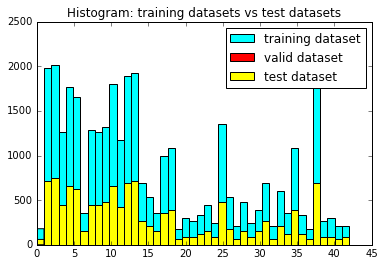

In [7]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# Add detailed data summary 
print("Training set\nLabels: {0}\nTotal Images: {1}".format(len(set(y_train)), len(X_train)))
print("Validation set\nLabels: {0}\nTotal Images: {1}".format(len(set(y_valid)), len(X_valid)))
print("Test set\nLabels: {0}\nTotal Images: {1}".format(len(set(y_test)), len(X_test)))
# Histogram 
plt.title("Histogram: training datasets vs test datasets")
plt.hist(y_train, bins=43, label="training dataset", color="cyan")
plt.hist(y_valid, bins=43, label="valid dataset", color="red")
plt.hist(y_test, bins=43, label="test dataset", color="yellow")
plt.legend()
plt.show()

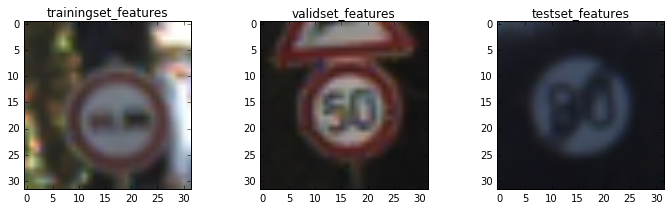

In [8]:
# Find random training and test traffic signs indices
trainingset_index = np.random.randint(0, len(X_train))
validset_index = np.random.randint(0, len(X_valid))
testset_index = np.random.randint(0, len(X_test))
# Read in training/test set 
trainingset_image = X_train[trainingset_index]
validset_image = X_valid[validset_index]
testset_image = X_test[testset_index]
# Display random single images for training and test sets
trainingset_features = single_img_features(trainingset_image)
validset_features = single_img_features(validset_image)
testset_features = single_img_features(testset_image)
images = [trainingset_features, validset_features, testset_features]
titles = ['trainingset_features', 'validset_features', 'testset_features']
fig = plt.figure(figsize=(12,3))#,dpi=80) # 12,3
visualize(fig, 1, 3, images, titles)

### 5- Training 1.6M parameters network, 2 convnets layers from scratch: 92% accuracy in 3 epochs

In [9]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 43 # 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32 #28, 28

# the data, shuffled and split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(K.image_data_format()) # Explains explictly the function 
print('x_train shape:', X_train.shape)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


channels_last
x_train shape: (34799, 32, 32, 3)
X_train shape: (34799, 32, 32, 3)
34799 train samples
12630 test samples


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=3,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/3
34799/34799 [==============================] - 239s - loss: 1.8064 - acc: 0.5183 - val_loss: 0.6360 - val_acc: 0.8285
Epoch 2/3
34799/34799 [==============================] - 237s - loss: 0.4828 - acc: 0.8638 - val_loss: 0.3780 - val_acc: 0.9072
Epoch 3/3
34799/34799 [==============================] - 249s - loss: 0.2774 - acc: 0.9234 - val_loss: 0.3202 - val_acc: 0.9222
Test loss: 0.320217017333
Test accuracy: 0.922169437809
